In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ankitachoudhury01/covid-patients-chest-xray

  0% 0.00/5.64M [00:00<?, ?B/s]
100% 5.64M/5.64M [00:00<00:00, 112MB/s]


In [ ]:
! unzip covid-patients-chest-xray.zip

Archive:  covid-patients-chest-xray.zip
  inflating: COVID PATIENTS/COVID/covid_0.jpg  
  inflating: COVID PATIENTS/COVID/covid_1.jpg  
  inflating: COVID PATIENTS/COVID/covid_10.jpg  
  inflating: COVID PATIENTS/COVID/covid_100.jpg  
  inflating: COVID PATIENTS/COVID/covid_101.jpg  
  inflating: COVID PATIENTS/COVID/covid_102.jpg  
  inflating: COVID PATIENTS/COVID/covid_103.jpg  
  inflating: COVID PATIENTS/COVID/covid_104.jpg  
  inflating: COVID PATIENTS/COVID/covid_105.jpg  
  inflating: COVID PATIENTS/COVID/covid_106.jpg  
  inflating: COVID PATIENTS/COVID/covid_107.jpg  
  inflating: COVID PATIENTS/COVID/covid_108.jpg  
  inflating: COVID PATIENTS/COVID/covid_109.jpg  
  inflating: COVID PATIENTS/COVID/covid_11.jpg  
  inflating: COVID PATIENTS/COVID/covid_110.jpg  
  inflating: COVID PATIENTS/COVID/covid_111.jpg  
  inflating: COVID PATIENTS/COVID/covid_112.jpg  
  inflating: COVID PATIENTS/COVID/covid_113.jpg  
  inflating: COVID PATIENTS/COVID/covid_114.jpg  
  inflating: COV

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import feature
import cv2

In [ ]:
DIR_normal=os.listdir('/content/COVID PATIENTS/COVID')
DIR_covid=os.listdir('/content/NORMAL PATIENTS/NORMAL')
print(len(DIR_normal))
print(len(DIR_covid))
normal_covid=[]
normal_covid.extend(DIR_normal)
normal_covid.extend(DIR_covid)
print(len(normal_covid))
normal_covid[:5]

162
162
324


['covid_31.jpg',
 'covid_45.jpg',
 'covid_44.jpg',
 'covid_98.jpg',
 'covid_156.jpg']

In [ ]:
label=[]
image=[]
for i in normal_covid:
    if  i.split('_')[0]=='normal':
        img=cv2.imread('/content/NORMAL PATIENTS/NORMAL/'+i)
        img = cv2.resize(img, (244, 244))
        hog_desc = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
            cells_per_block=(2,2), transform_sqrt=True, block_norm='L2-Hys')
        image.append(hog_desc)
        label.append(0)
    else:
        img=cv2.imread('/content/COVID PATIENTS/COVID/'+i)
        img = cv2.resize(img, (244, 244))
        hog_desc = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
            cells_per_block=(2,2), transform_sqrt=True, block_norm='L2-Hys')
        image.append(hog_desc)
        label.append(1)

In [ ]:
print(len(image))
print(len(label))

324
324


In [ ]:
data=np.array(list(zip(image,label)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data[:,0],data[:,1],test_size=0.2,random_state=35)

In [ ]:
list(y_train)

In [ ]:
type(image)

list

In [ ]:
img=cv2.imread('/content/COVID PATIENTS/COVID/covid_111.jpg')
img = cv2.resize(img, (244, 244))
hog_desc = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
pred= svm_model.predict(hog_desc.reshape(1,-1))

In [ ]:
np.mean(pred==y_test)

0.8923076923076924

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=150,n_jobs=-1)
clf.fit(list(X_train),list(y_train))
pred=clf.predict(list(X_test))
np.mean(pred==y_test)

0.9230769230769231

In [ ]:
import joblib
joblib.dump(clf, 'model.joblib')

['model.joblib']

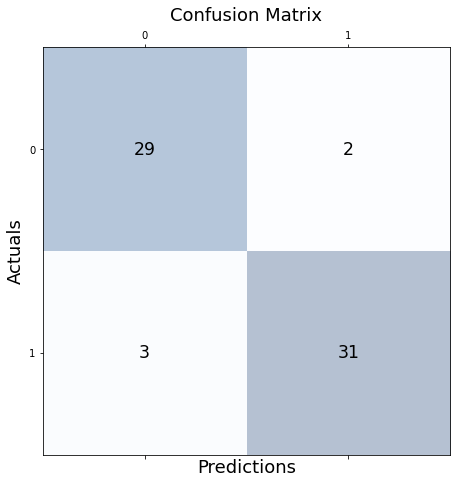

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test.astype(int), y_pred=pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
y_test.astype(int)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
clf.feature_importances_.shape

(30276,)